In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [70]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Find the linear regression equation for this data.

In [71]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


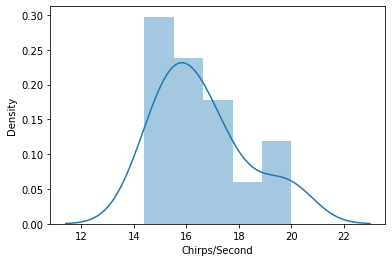

In [72]:
import seaborn as sns
sns.distplot(df["Chirps/Second"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


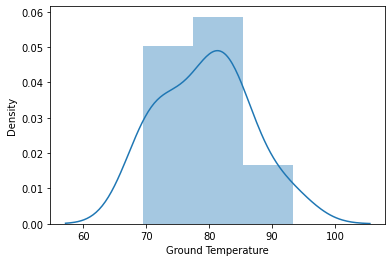

In [73]:
sns.distplot(df["Ground Temperature"])

In [74]:
y=df["Chirps/Second"]
X=df["Ground Temperature"]

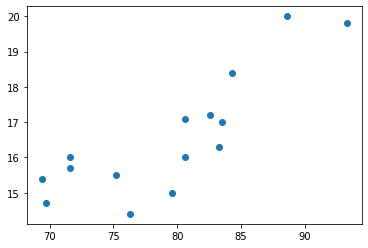

In [7]:
plt.scatter(X,y)

In [9]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [42]:
model = LinearRegression().fit(X_train, y_train)

In [43]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: 28.609967402206607
slope: [3.10822049]


The Linear Regression for this Data is 

y_pred=(29.185*X_test)+3.075

Where the slope is 29.185

The intercept is 3.075

In [44]:
y_pred = model.predict(X_test)
y_pred

array([78.34149532, 74.30080868])

In [45]:
df_1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df_1

,Actual,Predicted
0,71.6,78.341495
1,69.7,74.300809


# Chart the original data and the equation on the chart.

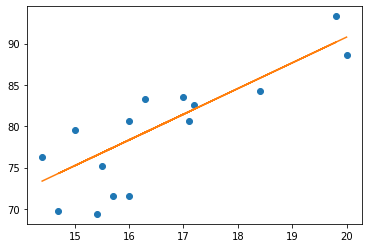

In [46]:
plt.plot(X,y,"o")
plt.plot(X,model.predict(X))

# Find the equation's  R2  score 

In [49]:
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6923514839358196


Seems like the model R2 score is lesser than 0.8 and amounts to 0.692
Ther is no strong correlation between the values

# Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [51]:
model.predict([[95]])

array([323.89091441])

The chirping per second for the temprature 95 is 323.89

# Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [53]:
from scipy.interpolate import interp1d

In [54]:
interpolate_X = 18

In [62]:
y=df["Ground Temperature"]
X=df["Chirps/Second"]

In [63]:
y_interp = interp1d(X, y)

In [64]:
print("Value of Y at x = {} is".format(interpolate_X),
      y_interp(interpolate_X))

Value of Y at x = 18 is 83.73333333333333


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# Find the linear regression equation for this data for brain weight to body weight.

In [75]:
df_2 = pd.read_fwf("https://raw.githubusercontent.com/Vsekar05/Datasets/main/brain_body.txt")

In [76]:
df_2

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [78]:
y=df_2["Body"]
X=df_2["Brain"]

In [79]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


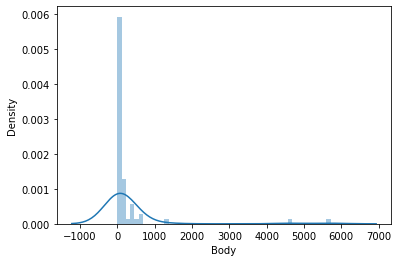

In [80]:
sns.distplot(df_2["Body"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


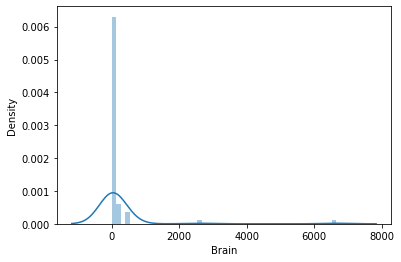

In [81]:
sns.distplot(df_2["Brain"])

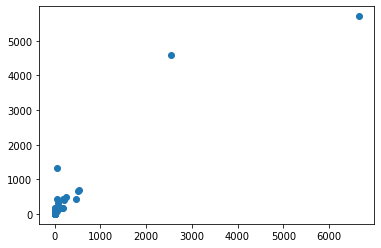

In [82]:
plt.scatter(X,y)

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [85]:
y=df_2["Body"]
X=df_2[["Brain"]]

In [87]:
model = LinearRegression().fit(X_train, y_train)

In [88]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 31.98221174575076
slope: [1.74694497]


The Linear Regression for this Data is 

y_pred=(31.982*X_test)+1.746

Where the slope is 31.982

The intercept is 1.746

# Chart the original data and the equation on the chart.

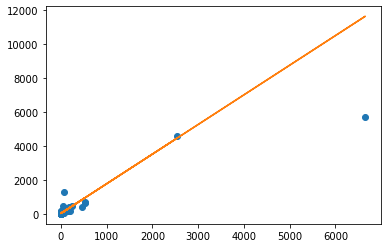

In [89]:
plt.plot(X,y,"o")
plt.plot(X,model.predict(X))

# Find the equation's  R2  score

In [90]:
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9187132973008482


The R2 score for this model is 0.918 which is greater than 0.8 which says that ther is a strong correlation between the values

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

# Find the linear regression equation for this data using columns 1-5 to column 6.


In [91]:
df_3 = pd.read_fwf("https://raw.githubusercontent.com/Vsekar05/Datasets/main/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [92]:
df_3

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [97]:
df_3.shape

(52, 6)

In [95]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [96]:
df_3.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


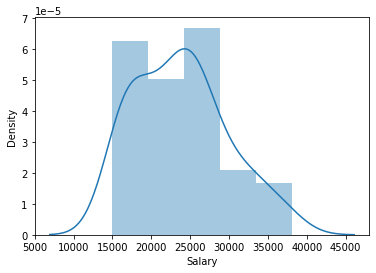

In [100]:
sns.distplot(df_3["Salary"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


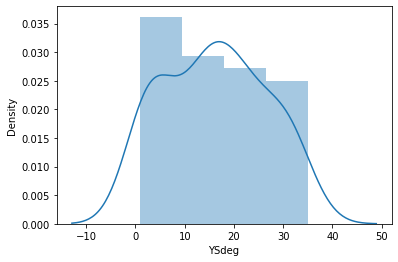

In [101]:
sns.distplot(df_3["YSdeg"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


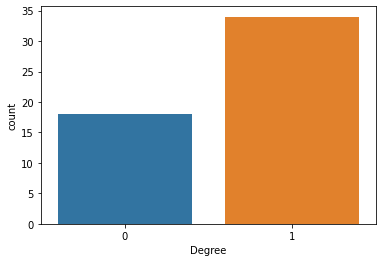

In [103]:
sns.countplot(df_3["Degree"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


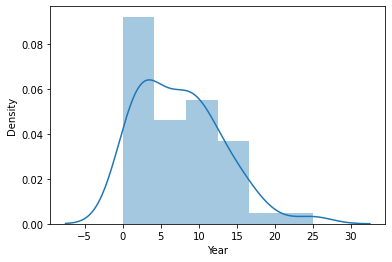

In [104]:
sns.distplot(df_3["Year"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


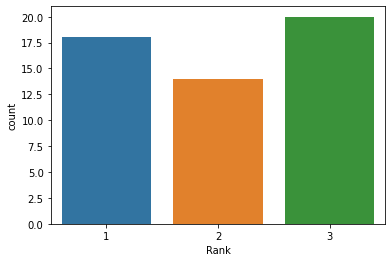

In [105]:
sns.countplot(df_3["Rank"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


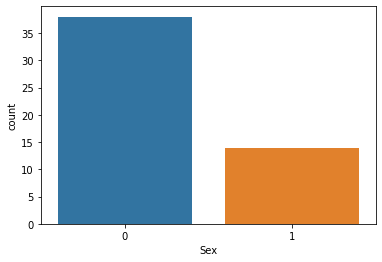

In [106]:
sns.countplot(df_3["Sex"])
plt.show()

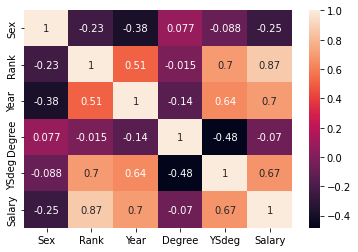

In [98]:
sns.heatmap(df_3.corr(),annot=True)
plt.show()

In [121]:
X=df_3[["Sex"]]
y=df_3["Salary"]

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [124]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [125]:
y_pred = model.predict(X_test)
y_pred

array([24580.85185185, 24580.85185185, 24580.85185185, 21245.83333333,
       24580.85185185, 21245.83333333, 24580.85185185, 24580.85185185,
       24580.85185185, 24580.85185185, 24580.85185185, 24580.85185185,
       24580.85185185])

In [126]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2941.905982905982
Mean Squared Error: 16811038.655323412
Root Mean Squared Error: 4100.126663326807


In [127]:
score = model.score(X_train,y_train)
print(score)
print(score*100,"%")

0.05976142527830586
5.976142527830586 %


In [133]:
X=df_3[["Year"]]
y=df_3["Salary"]

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [135]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)
y_pred

array([20455.40688994, 21250.61828002, 29997.94357092, 22841.04106018,
       26021.88662051, 26021.88662051, 20455.40688994, 25226.67523043,
       26817.09801059, 33178.78913125, 27612.30940068, 23636.25245026,
       26817.09801059])

In [137]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2844.36476783841
Mean Squared Error: 11211454.939176647
Root Mean Squared Error: 3348.351077646525


In [138]:
score = model.score(X_train,y_train)
print(score)
print(score*100,"%")

0.5028859008986515
50.288590089865146 %


In [140]:
X=df_3[["Rank"]]
y=df_3["Salary"]

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [142]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [143]:
y_pred = model.predict(X_test)
y_pred

array([23229.07204117, 16879.47684391, 23229.07204117, 23229.07204117,
       29578.66723842, 16879.47684391, 16879.47684391, 16879.47684391,
       23229.07204117, 29578.66723842, 29578.66723842, 29578.66723842,
       23229.07204117])

In [144]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2271.477767515504
Mean Squared Error: 8658969.09613433
Root Mean Squared Error: 2942.6126310023087


In [145]:
score = model.score(X_train,y_train)
print(score)
print(score*100,"%")

0.7795968306350634
77.95968306350633 %


In [151]:
X=df_3[["Degree"]]
y=df_3["Salary"]

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [153]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [154]:
y_pred = model.predict(X_test)
y_pred

array([23960.41666667, 23374.37037037, 23374.37037037, 23960.41666667,
       23374.37037037, 23960.41666667, 23374.37037037, 23960.41666667,
       23374.37037037, 23960.41666667, 23374.37037037, 23374.37037037,
       23960.41666667])

In [155]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3398.2094017094014
Mean Squared Error: 18241425.232338816
Root Mean Squared Error: 4270.998154101546


In [156]:
score = model.score(X_train,y_train)
print(score)
print(score*100,"%")

0.0018453905754545197
0.18453905754545197 %


In [158]:
X=df_3[["YSdeg"]]
y=df_3["Salary"]

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [160]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [161]:
y_pred = model.predict(X_test)
y_pred

array([19873.55910351, 18606.81620677, 24940.53069044, 29163.00701289,
       26629.52121942, 23251.54016147, 18606.81620677, 22829.29252922,
       22829.29252922, 29585.25464514, 26207.27358718, 22407.04489698,
       30007.50227738])

In [162]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2963.0749265435124
Mean Squared Error: 14669686.140373778
Root Mean Squared Error: 3830.102627916617


In [163]:
score = model.score(X_train,y_train)
print(score)
print(score*100,"%")

0.4907605482718925
49.07605482718925 %


**Seems Like the Column Rank has the linear relationship with Salary**

Sex has no relationship with the Salary

The best Features for creating this model are YSdeg year and Rank

In [170]:
X=df_3[["Rank","Year","YSdeg"]]
y=df_3["Salary"]

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [172]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [173]:
y_pred = model.predict(X_test)
y_pred

array([22108.82861965, 17271.60488955, 26383.83323844, 22317.47902369,
       29569.71312613, 19182.76489615, 16870.08604409, 18826.51451125,
       25004.10015941, 32866.50351135, 30418.01927762, 28817.84119536,
       24234.53632987])

In [174]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1701.113200785368
Mean Squared Error: 5093142.490599468
Root Mean Squared Error: 2256.7991693102576


In [175]:
score = model.score(X_train,y_train)
print(score)
print(score*100,"%")

0.8611855066128222
86.11855066128223 %


# Report that sex has no affinity to salary

In [176]:
X=df_3[["Sex"]]
y=df_3["Salary"]

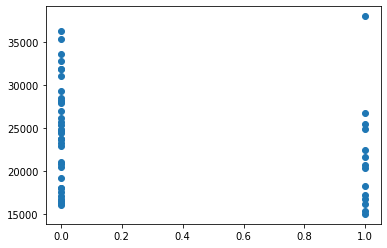

In [177]:
plt.scatter(X,y)